# 数字图像处理Demo演示

In [1]:
import os

from modules.layout import Layout
from modules.brightness import Brightness
from modules.saturation import Saturation
from modules.utils import Utils
from SCUNet.scunet import Denoising
from Neural_IMage_Assessment.NIMA import NIMA_predict
from portraitNet.pred_img import PortraitSeg
import cv2
import time
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def print_lines(img, points):
    img = img.copy()
    for pair in Utils.POSE_PAIRS:
        part_from = pair[0]
        part_to = pair[1]
        assert (part_from in Utils.BODY_PARTS)
        assert (part_to in Utils.BODY_PARTS)

        id_from = Utils.BODY_PARTS[part_from]
        id_to = Utils.BODY_PARTS[part_to]

        if points[id_from] and points[id_to]:
            cv2.line(img, points[id_from], points[id_to], (0, 255, 0), 3)
            cv2.ellipse(img, points[id_from], (3, 3), 0, 0, 360, (0, 0, 255), cv2.FILLED)
            cv2.ellipse(img, points[id_to], (3, 3), 0, 0, 360, (0, 0, 255), cv2.FILLED)

    return img

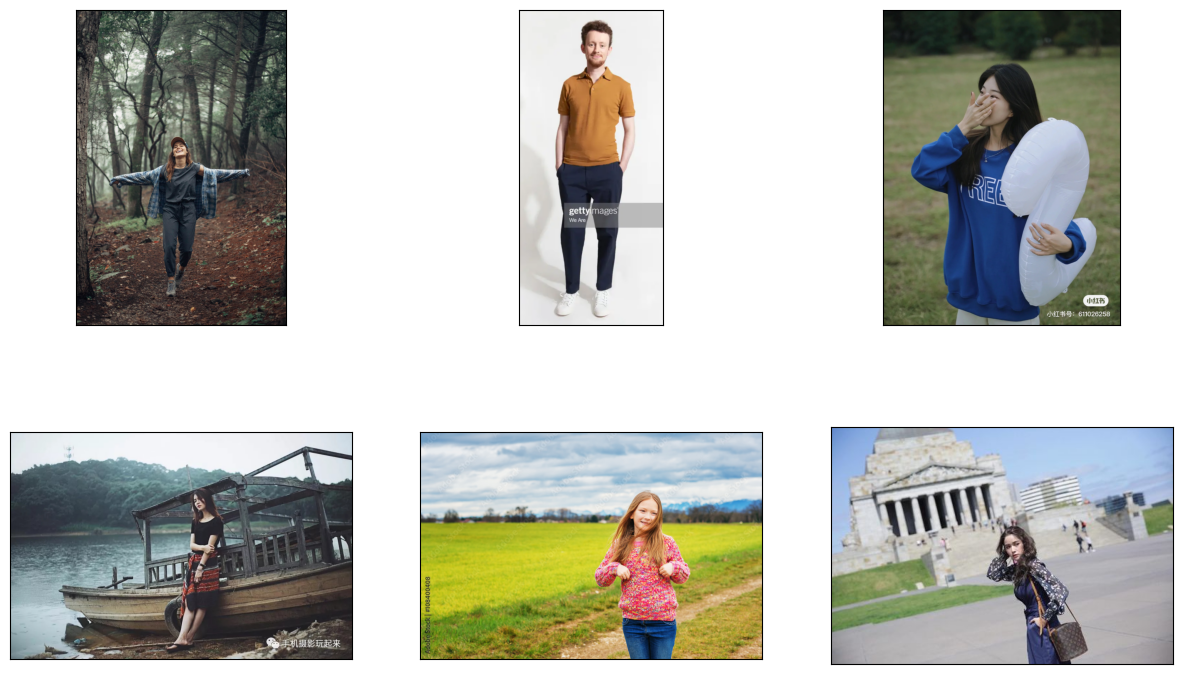

In [3]:
rows, cols = 2, 3

imgs = sorted(os.listdir('test_imgs/body/'))[:rows * cols]
plt.figure(figsize=(15,9))
for i in range(rows):
    for j in range(cols):
        plt.subplot(rows, cols, i * cols + j + 1)
        image = cv2.imread('test_imgs/body/' + imgs[i * cols + j])
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.imshow(image)
        plt.xticks([])
        plt.yticks([])
plt.show()

<Figure size 500x500 with 0 Axes>

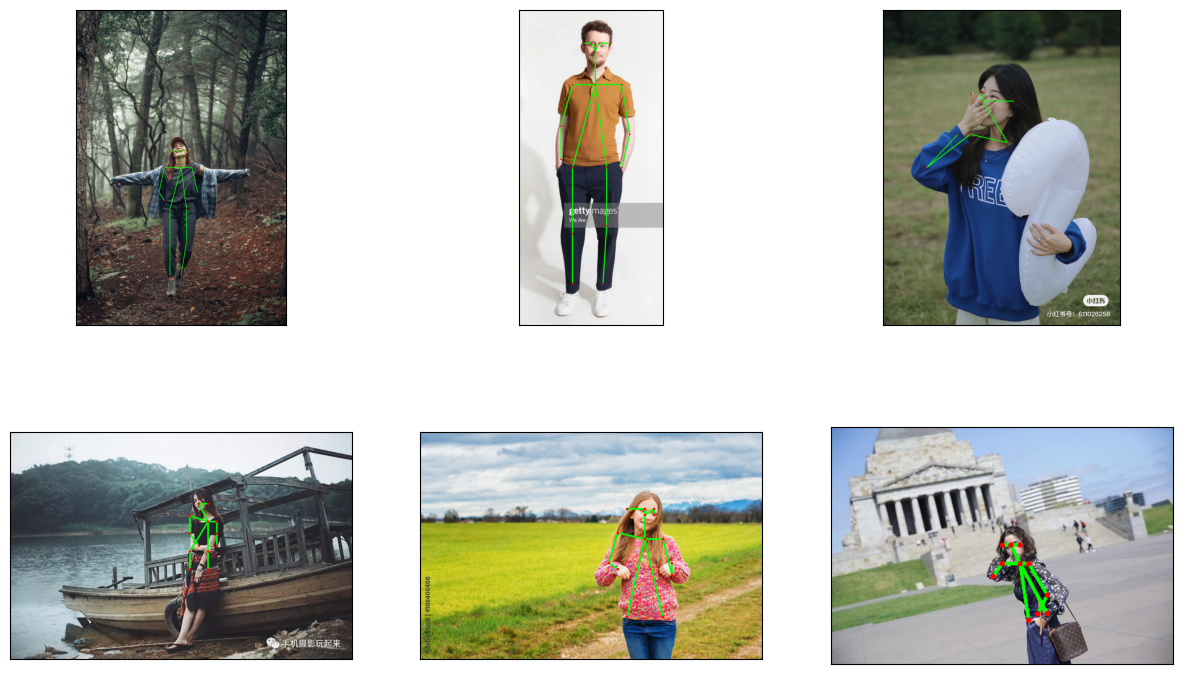

In [4]:
plt.clf()
plt.figure(figsize=(15,9))
for i in range(rows):
    for j in range(cols):
        plt.subplot(rows, cols, i * cols + j + 1)
        image = cv2.imread('test_imgs/body/' + imgs[i * cols + j])
        points = Utils.get_pose_point(image)
        image = print_lines(image, points)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.imshow(image)
        plt.xticks([])
        plt.yticks([])
plt.show()

In [5]:
layout = Layout('./modules/graph_opt.pb')

for i in range(rows):
    for j in range(cols):
        print('-'*15+'image {}'.format(i * cols + j)+'-'*15)
        image = cv2.imread('test_imgs/body/' + imgs[i * cols + j])
        layout_score = layout.cal_score(image)  # 布局得分
        print('layout_score: ', layout_score)

---------------image 0---------------
angle: 2.76°	angle score: 10.00
position score: 10.00
layout_score:  10.0
---------------image 1---------------
angle: 2.79°	angle score: 10.00
position score: 3.50
layout_score:  6.75
---------------image 2---------------
无法计算人体倾斜的角度
position score: 7.00
layout_score:  7.0
---------------image 3---------------
angle: 0.00°	angle score: 10.00
position score: 7.00
layout_score:  8.5
---------------image 4---------------
angle: 0.10°	angle score: 10.00
position score: 5.00
layout_score:  7.5
---------------image 5---------------
angle: 20.71°	angle score: 0.00
position score: 10.00
layout_score:  5.0


---------------image 0---------------
dark_sum: 3138453.000
bright_sum: 7.000
piex_sum: 3538944.000
dark_prop=dark_sum/piex_sum: 0.887
bright_prop=bright_sum/piex_sum: 0.000
dark!
brightness score: 1.74
---------------image 1---------------
dark_sum: 1675442.000
bright_sum: 11034.000
piex_sum: 3538944.000
dark_prop=dark_sum/piex_sum: 0.473
bright_prop=bright_sum/piex_sum: 0.003
fine!
brightness score: 8.10
---------------image 2---------------
dark_sum: 936496.000
bright_sum: 61160.000
piex_sum: 3538944.000
dark_prop=dark_sum/piex_sum: 0.265
bright_prop=bright_sum/piex_sum: 0.017
fine!
brightness score: 10.00
---------------image 3---------------
dark_sum: 198720.000
bright_sum: 483813.000
piex_sum: 3538944.000
dark_prop=dark_sum/piex_sum: 0.056
bright_prop=bright_sum/piex_sum: 0.137
bright!
brightness score: 9.59
---------------image 4---------------
dark_sum: 84200.000
bright_sum: 1128324.000
piex_sum: 3538944.000
dark_prop=dark_sum/piex_sum: 0.024
bright_prop=bright_sum/piex_sum: 0.

<Figure size 500x500 with 0 Axes>

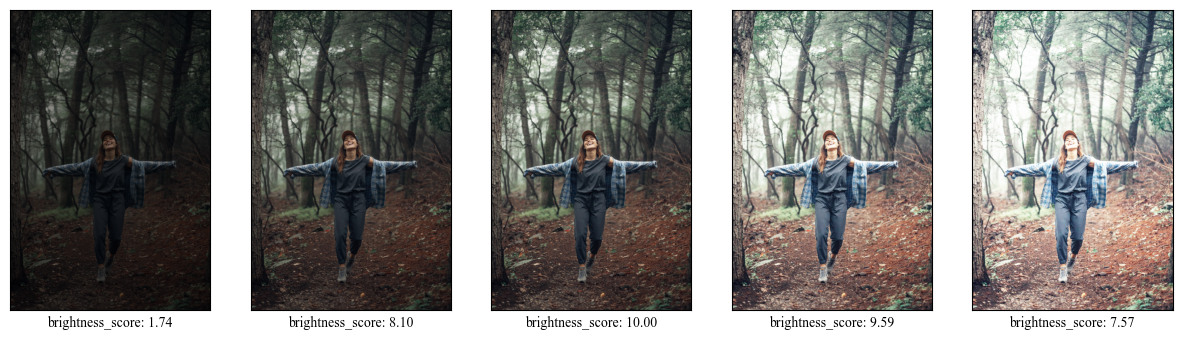

In [6]:
rows, cols = 1, 5
brightness = Brightness()

imgs = sorted(os.listdir('test_imgs/brightness/'))[:rows * cols]
plt.clf()
plt.figure(figsize=(15,6))
for i in range(rows):
    for j in range(cols):
        print('-'*15+'image {}'.format(i * cols + j)+'-'*15)
        plt.subplot(rows, cols, i * cols + j + 1)
        image = cv2.imread('test_imgs/brightness/' + imgs[i * cols + j])
        brightness_score = brightness.cal_score(image)  # 亮度得分
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.imshow(image)
        plt.xlabel('brightness_score: {:.2f}'.format(brightness_score), fontdict={'family' : 'Times New Roman', 'size'   : 10})
        plt.xticks([])
        plt.yticks([])
plt.show()

dark_sum: 3138453.000
bright_sum: 7.000
piex_sum: 3538944.000
dark_prop=dark_sum/piex_sum: 0.887
bright_prop=bright_sum/piex_sum: 0.000
dark!
brightness score: 1.74
adjust gamma:1.9368331909179686
dark_sum: 239845.000
bright_sum: 48.000
piex_sum: 3538944.000
dark_prop=dark_sum/piex_sum: 0.068
bright_prop=bright_sum/piex_sum: 0.000
fine!
brightness score: 10.00


<Figure size 500x500 with 0 Axes>

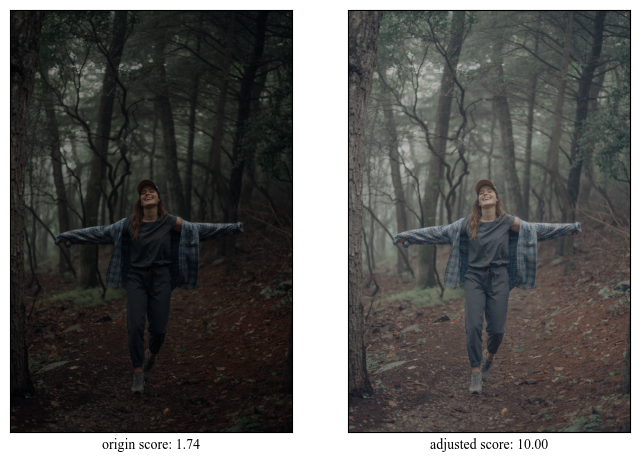

In [7]:
image = cv2.imread('test_imgs/brightness/img0.png')
plt.clf()
plt.figure(figsize=(8,6))

plt.subplot(121)
brightness_score = brightness.cal_score(image)  # 亮度得分
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.xticks([])
plt.yticks([])
plt.xlabel('origin score: {:.2f}'.format(brightness_score), fontdict={'family' : 'Times New Roman', 'size'   : 10})

plt.subplot(122)
adjust = brightness.opt_img(image)
adjust_rgb = cv2.cvtColor(adjust, cv2.COLOR_BGR2RGB)
brightness_score = brightness.cal_score(adjust)  # 亮度得分
plt.imshow(adjust_rgb)
plt.xlabel('adjusted score: {:.2f}'.format(brightness_score), fontdict={'family' : 'Times New Roman', 'size'   : 10})

plt.xticks([])
plt.yticks([])
plt.show()

---------------image 0---------------
contrast:  0.5600046464577434
图像对比度适中
---------------image 1---------------
contrast:  0.5686009653596172
图像对比度适中
---------------image 2---------------
contrast:  0.5711345850758524
图像对比度适中
---------------image 3---------------
contrast:  0.5736450893204526
图像对比度适中
---------------image 4---------------
contrast:  0.5755777696314885
图像对比度适中


<Figure size 500x500 with 0 Axes>

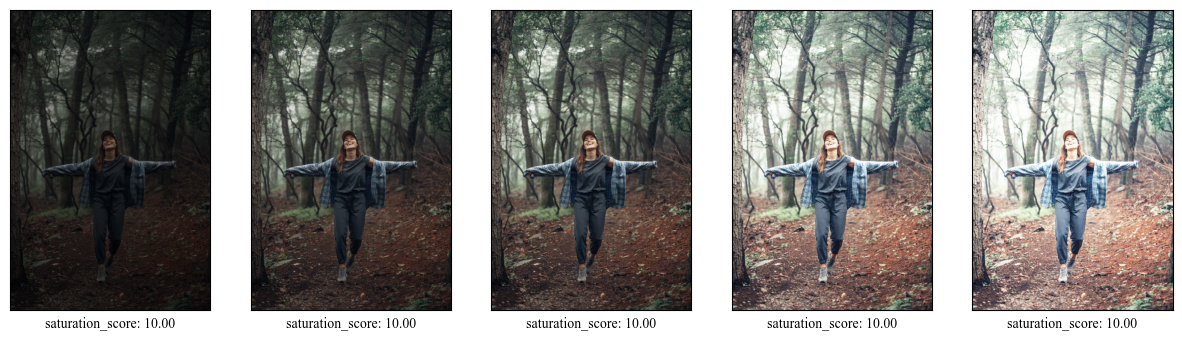

In [8]:
rows, cols = 1, 5

saturation = Saturation()
imgs = sorted(os.listdir('test_imgs/brightness/'))[:rows * cols]
plt.clf()
plt.figure(figsize=(15,6))
for i in range(rows):
    for j in range(cols):
        print('-'*15+'image {}'.format(i * cols + j)+'-'*15)
        plt.subplot(rows, cols, i * cols + j + 1)
        image = cv2.imread('test_imgs/brightness/' + imgs[i * cols + j])
        saturation_score = saturation.cal_score(image)  # 对比度得分
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.imshow(image)
        plt.xlabel('saturation_score: {:.2f}'.format(saturation_score), fontdict={'family' : 'Times New Roman', 'size'   : 10})
        plt.xticks([])
        plt.yticks([])
plt.show()